In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
current_path = os.getcwd()
parent_directory = os.path.dirname(current_path)
sys.path.append(parent_directory)
from Class.jenie import Jenie
import pandas as pd
import numpy as np
import scanpy as sc
import anndata
import umap.umap_ as umap
import leidenalg
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import pairwise_distances
from scipy.stats import zscore
from matplotlib.colorbar import ColorbarBase
import matplotlib.colors as mcolors
from umap import UMAP
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score
from kneed import KneeLocator
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ParameterGrid
from scipy.stats import ttest_rel
from scipy import stats
from scipy.spatial import KDTree
from scipy.spatial import cKDTree

In [3]:
plt.style.use('dark_background')

# Generate scdata dictionary

In [113]:
def create_h5ad_dict(folder_path):
    dir_list = os.listdir(folder_path)
    dir_list_revised = []
    for i in dir_list:
        if '._' not in i:
            dir_list_revised.append(i)
    dict = {}
    for i in dir_list_revised:
        title = i.split('.h5ad')[0]
        file_path = os.path.join(folder_path, i)
        dict[title] = sc.read_h5ad(file_path)
    return dict

In [115]:
cbm5_dict = create_h5ad_dict(r"D:\neuro data compile\Cbm5\samples")
cbm5_dict

{'cbm5_combined_neuropath_Mu15.1': AnnData object with n_obs × n_vars = 35460 × 223
     obs: 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'leiden', 'leiden_denovo', 'Experiment', 'Age', 'Section', 'Mouse', 'Treatment', 'Timepoint', 'Ptbp1', 'MERFISH celltype', 'New_PTB', 'com_celltype'
     var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
     uns: 'Mouse_colors', 'Section_colors', 'Treatment_colors', 'leiden', 'leiden_colors', 'leiden_denovo_colors', 'log1p', 'neighbors', 'pca'
     obsm: 'X_pca', 'X_spatial', 'X_umap', 'X_umap_denovo', 'rep'
     varm: 'PCs'
     layers: 'Raw counts'
     obsp: 'connectivities', 'distances',
 'cbm5_combined_neuropath_Mu15.2': AnnData object with n_obs × n_vars = 33127 × 223
     obs: 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'leiden', 'leiden_denovo', 'Experiment', 'Age'

In [116]:
edu_dict = create_h5ad_dict(r"D:\neuro data compile\edu Labeled")
edu_dict

{'4week_mouse_edu_labeled_revised': AnnData object with n_obs × n_vars = 147402 × 275
     obs: 'volm', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'edu_median', 'edu_mean', 'edu_pos', 'leiden', 'celltype', 'x', 'neurogenesis_pathway'
     var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
     uns: 'celltype_colors', 'leiden', 'log1p', 'neighbors', 'neurogenesis_pathway_colors', 'umap', 'x_colors'
     obsm: 'X_pca', 'X_raw', 'X_spatial', 'X_umap', 'rep'
     obsp: 'connectivities', 'distances',
 '1year_aso_labelled_revised': AnnData object with n_obs × n_vars = 143583 × 275
     obs: 'volm', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'edu_median', 'edu_mean', 'leiden', 'celltype', 'edu_pos', 'x', 'neurogenesis_pathway'
     var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'lo

In [117]:
ptb_dict = create_h5ad_dict(r"D:\neuro data compile\Ptb Labeled")
ptb_dict

{'adatasvz_neuro_noastro_ptb_injected_1week_revised': AnnData object with n_obs × n_vars = 11163 × 278
     obs: 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'leiden', 'neurogenesis_pathway'
     var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
     uns: 'log1p', 'neighbors', 'neurogenesis_pathway_colors', 'pca'
     obsm: 'X_pca', 'X_raw', 'X_spatial', 'X_umap', 'rep'
     varm: 'PCs'
     obsp: 'connectivities', 'distances',
 'adatasvz_neuro_noastro_ptb_injected_4_18_iset2_revised': AnnData object with n_obs × n_vars = 28711 × 275
     obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'leiden', 'neurogenesis_pathway'
     var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
     uns: 'log1p', 'neighbors', 'neurogenesis_pathway_colors', 'pca'
     ob

In [118]:
saline_dict = create_h5ad_dict(r"D:\neuro data compile\Saline Labeled")
saline_dict

C:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\anndata\_core\anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
C:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\anndata\_core\anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


{'DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023_iset1_revised': AnnData object with n_obs × n_vars = 114484 × 275
     obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'leiden', 'neurogenesis_pathway'
     var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
     uns: 'log1p', 'neighbors', 'neurogenesis_pathway_colors', 'pca'
     obsm: 'X_pca', 'X_raw', 'X_spatial', 'X_umap', 'rep'
     varm: 'PCs'
     obsp: 'connectivities', 'distances',
 'DCBBL1_3_2_2023_iset0_revised': AnnData object with n_obs × n_vars = 186537 × 275
     obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'leiden', 'neurogenesis_pathway'
     var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
     uns: 'log1p', 'neighbors', 'neurogenesis_pathway_colors', 'pca'
     obsm: 'X_pca', 'X_raw', 'X_spatial',

In [119]:
year1_dict = create_h5ad_dict(r"D:\neuro data compile\Year1\Samples")
year1_dict

{'year1s_labeled_edu_Non': AnnData object with n_obs × n_vars = 67966 × 275
     obs: 'volm', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'leiden', 'x', 'clusters', 'Treatment', 'edu_pos', 'EdU'
     obsm: 'X_pca', 'X_raw', 'X_spatial', 'X_spatial_original', 'X_umap',
 'year1s_labeled_edu_PTB-ASO': AnnData object with n_obs × n_vars = 163613 × 275
     obs: 'volm', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'leiden', 'x', 'clusters', 'Treatment', 'edu_pos', 'EdU'
     obsm: 'X_pca', 'X_raw', 'X_spatial', 'X_spatial_original', 'X_umap',
 'year1s_labeled_edu_Control': AnnData object with n_obs × n_vars = 150232 × 275
     obs: 'volm', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'leiden', 'x', 'clusters', 'Treatment', 'edu_pos', 'EdU'
     obsm: 'X_pca', 'X_raw', 'X_spatial', 'X_spatial_original', 'X_umap'}

In [120]:
concated_dict = cbm5_dict | edu_dict | ptb_dict | saline_dict | year1_dict
concated_dict

{'cbm5_combined_neuropath_Mu15.1': AnnData object with n_obs × n_vars = 35460 × 223
     obs: 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'leiden', 'leiden_denovo', 'Experiment', 'Age', 'Section', 'Mouse', 'Treatment', 'Timepoint', 'Ptbp1', 'MERFISH celltype', 'New_PTB', 'com_celltype'
     var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
     uns: 'Mouse_colors', 'Section_colors', 'Treatment_colors', 'leiden', 'leiden_colors', 'leiden_denovo_colors', 'log1p', 'neighbors', 'pca'
     obsm: 'X_pca', 'X_spatial', 'X_umap', 'X_umap_denovo', 'rep'
     varm: 'PCs'
     layers: 'Raw counts'
     obsp: 'connectivities', 'distances',
 'cbm5_combined_neuropath_Mu15.2': AnnData object with n_obs × n_vars = 33127 × 223
     obs: 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'leiden', 'leiden_denovo', 'Experiment', 'Age'

# Celltype Quantifications

### Generate pipeline basis

In [133]:
def quantify_cells_pipeline(scdata, dataset_title, cell_list, generate_charts = False, save = False, edu = False):
    name = ''
    celltype_list_title = ['neurogenesis_pathway','clusters','com_celltype']
    for item in list(scdata.obs.columns):
        if item in celltype_list_title:
            name = item
    if edu:
        scdata = scdata[scdata.obs.edu_pos == '1']
    scdata = scdata[scdata.obs[name].isin(celltype_list)]
    scdata.obs['count'] = 0
    df = scdata.obs.groupby([name]).count().reset_index()[[name, 'count']]
    df['dataset'] = dataset_title
    if generate_charts:
        plt.bar(x = name, height = 'count', data = df)
        if edu == False:
            plt.title(f'{dataset_title} Celltype Count')
        else:
            plt.title(f'{dataset_title} Edu Celltype Count')
        if save == True:
            if edu == False:
                plt.savefig(rf"D:\neuro data compile\Celltype Quantification Output\Bar Graphs\{dataset_title}.png")
                df.to_csv(rf"D:\neuro data compile\Celltype Quantification Output\Tables\{dataset_title}.csv")
            else:
                plt.savefig(rf"D:\neuro data compile\Celltype Quantification Output\Bar Graphs\{dataset_title}_edu_quantified.png")
                df.to_csv(rf"D:\neuro data compile\Celltype Quantification Output\Tables\{dataset_title}_edu_quantified.csv")
        plt.show()
    return df

In [121]:
celltype_list = ['Ependymal', 'Stage 1', 'Stage 2', 'Stage 3', 'Progenitor', 'Lateral ependymal']

C:\Users\krist\AppData\Local\Temp\ipykernel_66796\1753597165.py:8: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  scdata.obs['count'] = 0


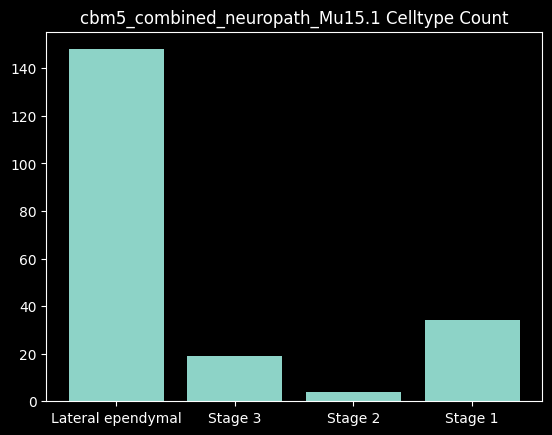

C:\Users\krist\AppData\Local\Temp\ipykernel_66796\1753597165.py:8: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  scdata.obs['count'] = 0


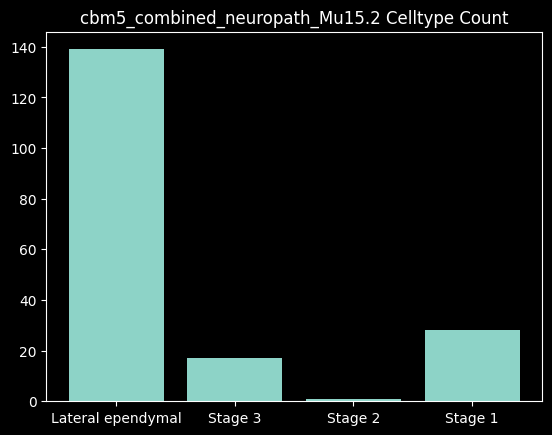

C:\Users\krist\AppData\Local\Temp\ipykernel_66796\1753597165.py:8: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  scdata.obs['count'] = 0


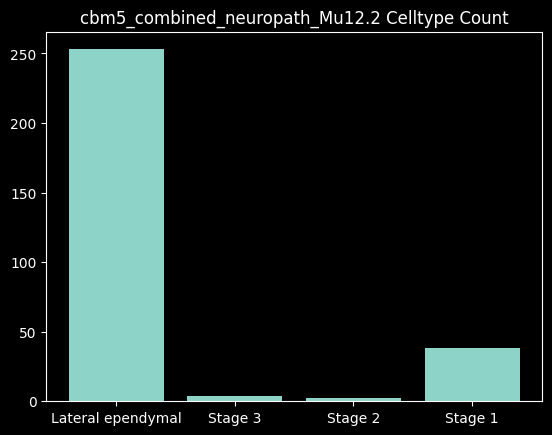

C:\Users\krist\AppData\Local\Temp\ipykernel_66796\1753597165.py:8: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  scdata.obs['count'] = 0


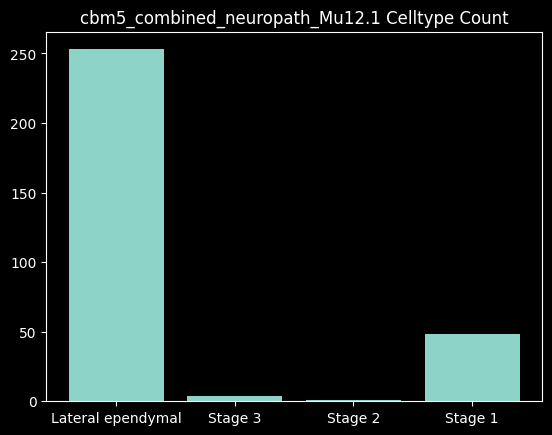

C:\Users\krist\AppData\Local\Temp\ipykernel_66796\1753597165.py:8: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  scdata.obs['count'] = 0


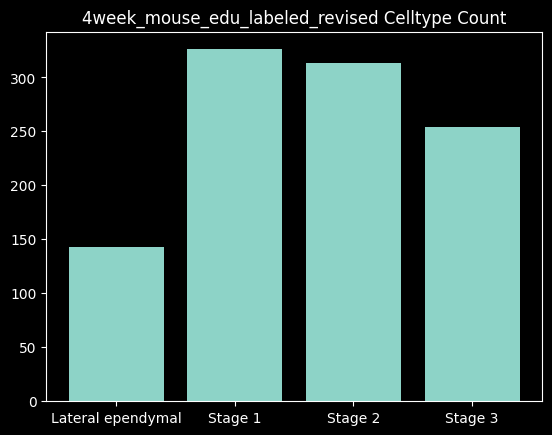

C:\Users\krist\AppData\Local\Temp\ipykernel_66796\1753597165.py:8: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  scdata.obs['count'] = 0


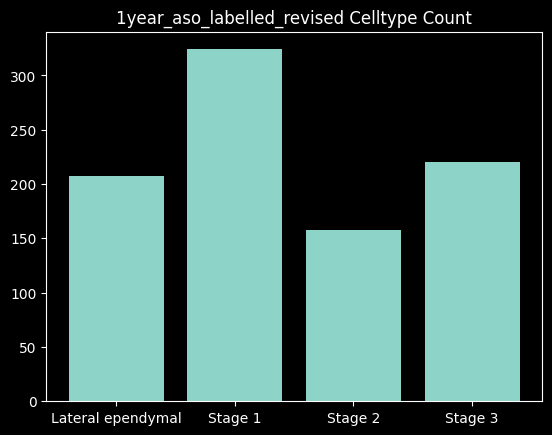

C:\Users\krist\AppData\Local\Temp\ipykernel_66796\1753597165.py:8: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  scdata.obs['count'] = 0


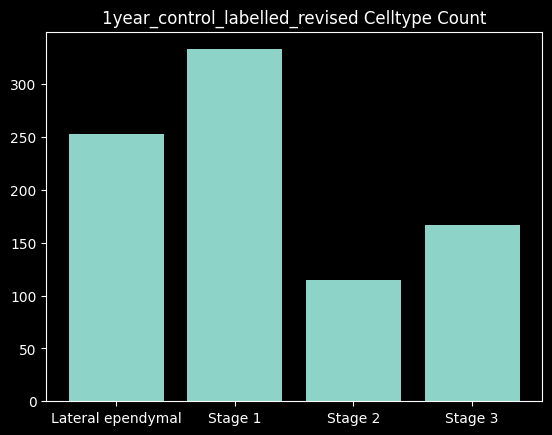

C:\Users\krist\AppData\Local\Temp\ipykernel_66796\1753597165.py:8: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  scdata.obs['count'] = 0


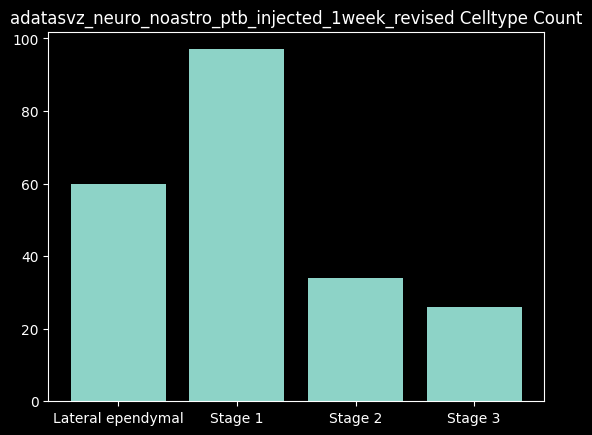

C:\Users\krist\AppData\Local\Temp\ipykernel_66796\1753597165.py:8: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  scdata.obs['count'] = 0


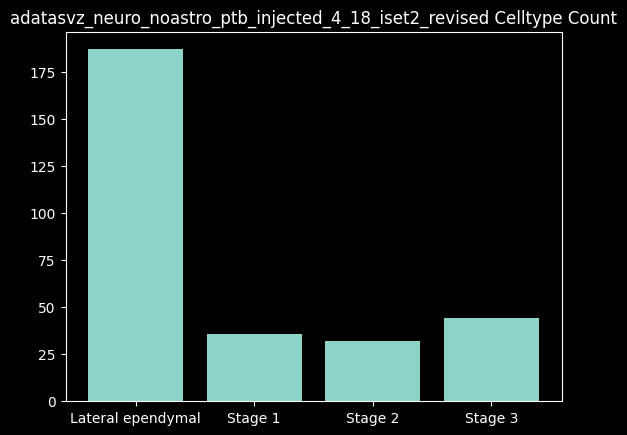

C:\Users\krist\AppData\Local\Temp\ipykernel_66796\1753597165.py:8: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  scdata.obs['count'] = 0


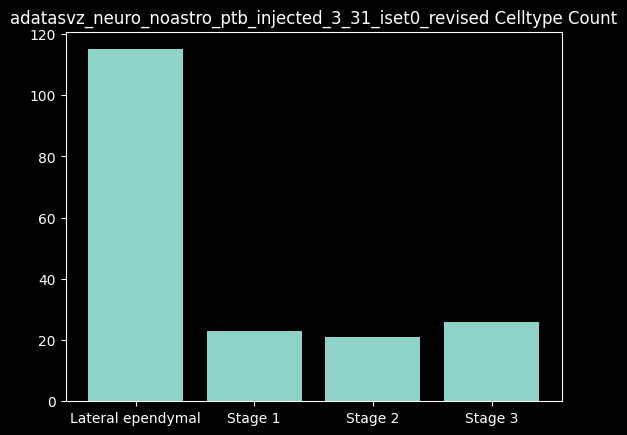

C:\Users\krist\AppData\Local\Temp\ipykernel_66796\1753597165.py:8: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  scdata.obs['count'] = 0


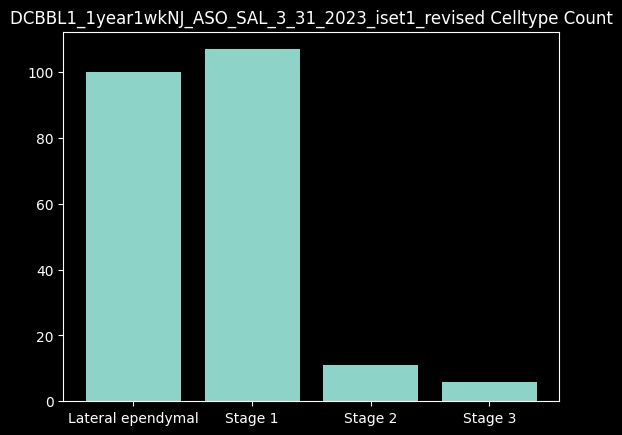

C:\Users\krist\AppData\Local\Temp\ipykernel_66796\1753597165.py:8: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  scdata.obs['count'] = 0
C:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\anndata\_core\anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
C:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\anndata\_core\anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


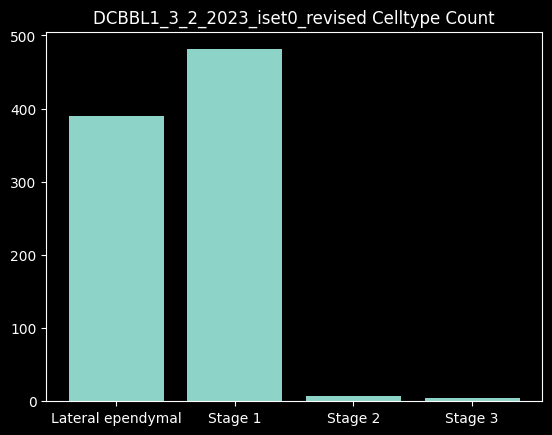

C:\Users\krist\AppData\Local\Temp\ipykernel_66796\1753597165.py:8: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  scdata.obs['count'] = 0


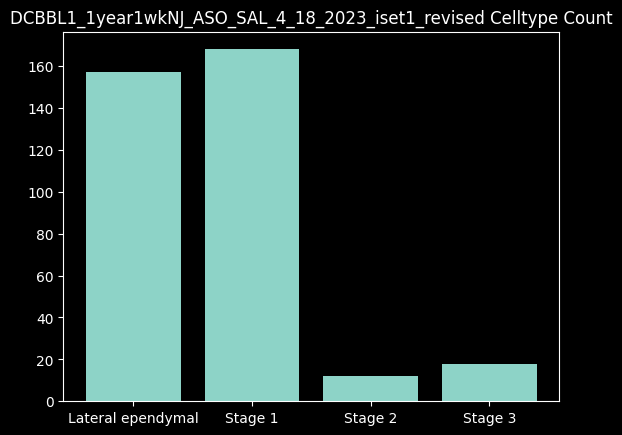

C:\Users\krist\AppData\Local\Temp\ipykernel_66796\1753597165.py:8: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  scdata.obs['count'] = 0


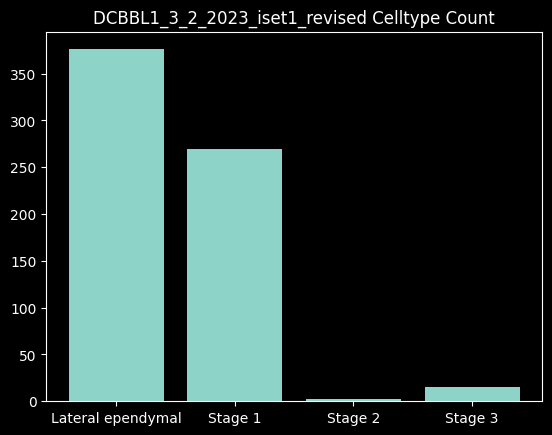

C:\Users\krist\AppData\Local\Temp\ipykernel_66796\1753597165.py:8: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  scdata.obs['count'] = 0


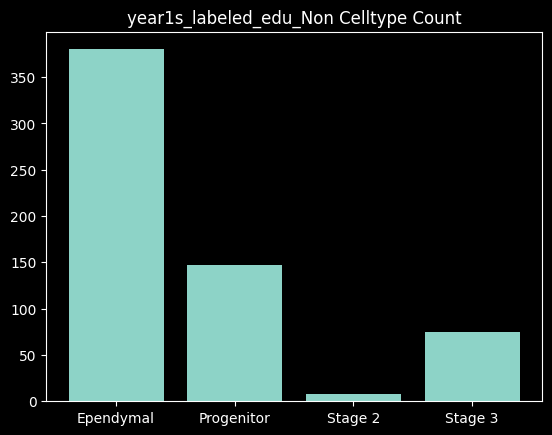

C:\Users\krist\AppData\Local\Temp\ipykernel_66796\1753597165.py:8: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  scdata.obs['count'] = 0


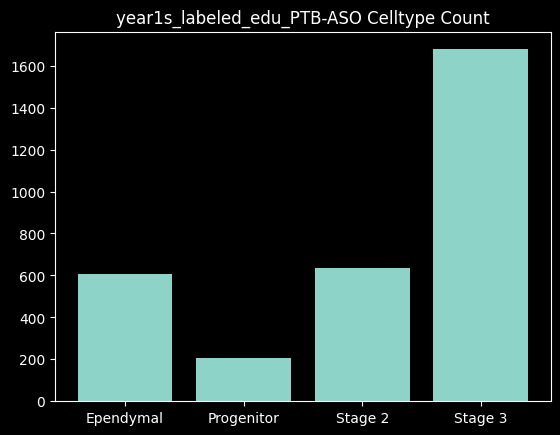

C:\Users\krist\AppData\Local\Temp\ipykernel_66796\1753597165.py:8: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  scdata.obs['count'] = 0


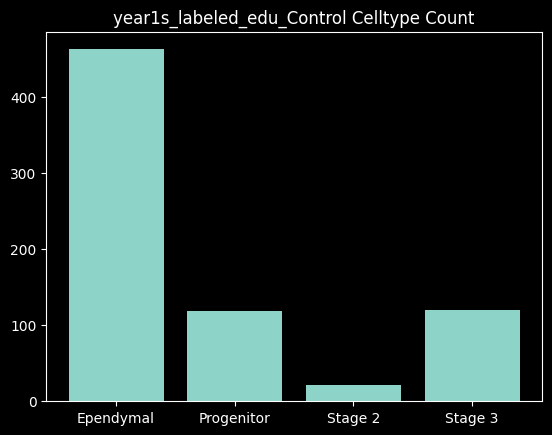

In [122]:
for sample in concated_dict:
    quantify_cells_pipeline(concated_dict[sample], sample, celltype_list, generate_charts=True, save = True)

In [124]:
edu_pos_dict = {}
for sample in concated_dict:
    if 'edu_pos' in concated_dict[sample].obs.columns:
        edu_pos_dict[sample] = concated_dict[sample]
edu_pos_dict

{'4week_mouse_edu_labeled_revised': AnnData object with n_obs × n_vars = 147402 × 275
     obs: 'volm', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'edu_median', 'edu_mean', 'edu_pos', 'leiden', 'celltype', 'x', 'neurogenesis_pathway'
     var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
     uns: 'celltype_colors', 'leiden', 'log1p', 'neighbors', 'neurogenesis_pathway_colors', 'umap', 'x_colors'
     obsm: 'X_pca', 'X_raw', 'X_spatial', 'X_umap', 'rep'
     obsp: 'connectivities', 'distances',
 '1year_aso_labelled_revised': AnnData object with n_obs × n_vars = 143583 × 275
     obs: 'volm', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'edu_median', 'edu_mean', 'leiden', 'celltype', 'edu_pos', 'x', 'neurogenesis_pathway'
     var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'lo

C:\Users\krist\AppData\Local\Temp\ipykernel_66796\4208300978.py:10: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  scdata.obs['count'] = 0


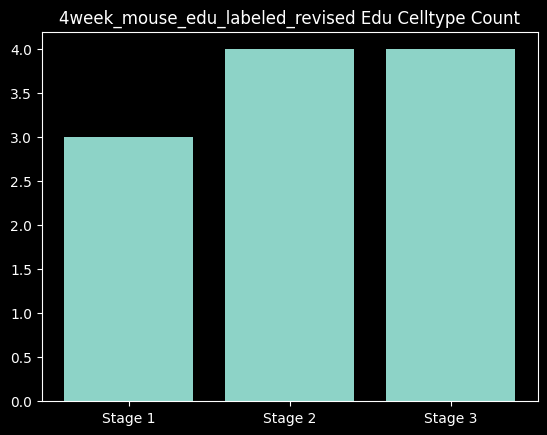

C:\Users\krist\AppData\Local\Temp\ipykernel_66796\4208300978.py:10: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  scdata.obs['count'] = 0


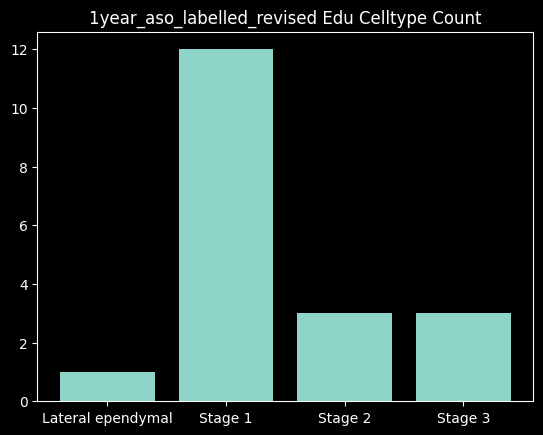

C:\Users\krist\AppData\Local\Temp\ipykernel_66796\4208300978.py:10: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  scdata.obs['count'] = 0


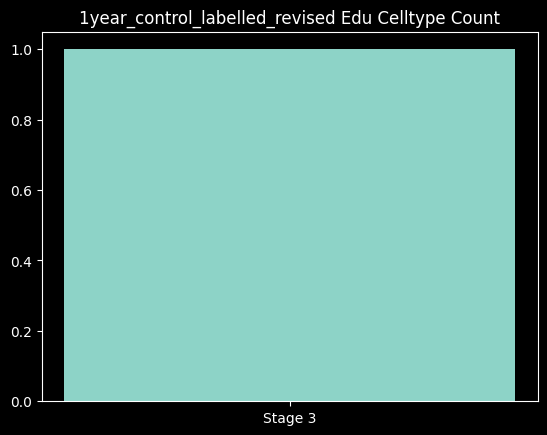

C:\Users\krist\AppData\Local\Temp\ipykernel_66796\4208300978.py:10: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  scdata.obs['count'] = 0


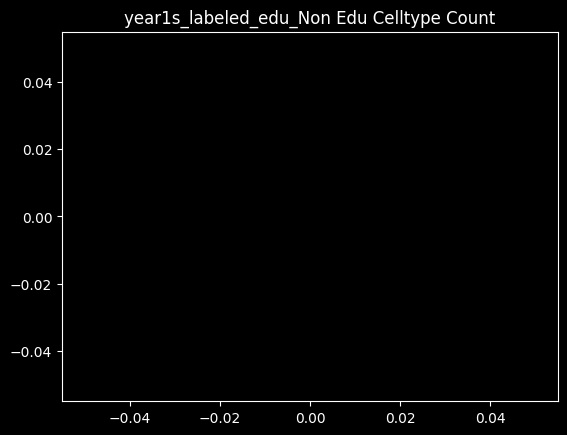

C:\Users\krist\AppData\Local\Temp\ipykernel_66796\4208300978.py:10: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  scdata.obs['count'] = 0


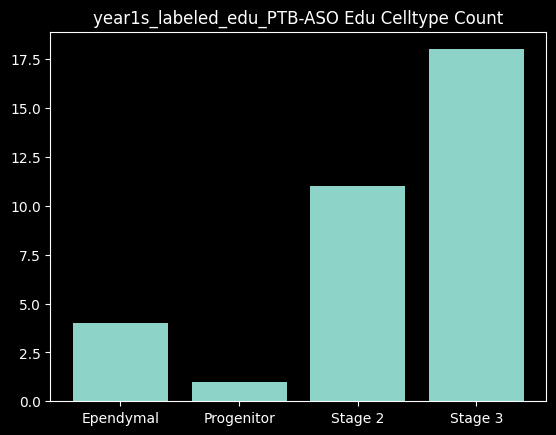

C:\Users\krist\AppData\Local\Temp\ipykernel_66796\4208300978.py:10: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  scdata.obs['count'] = 0


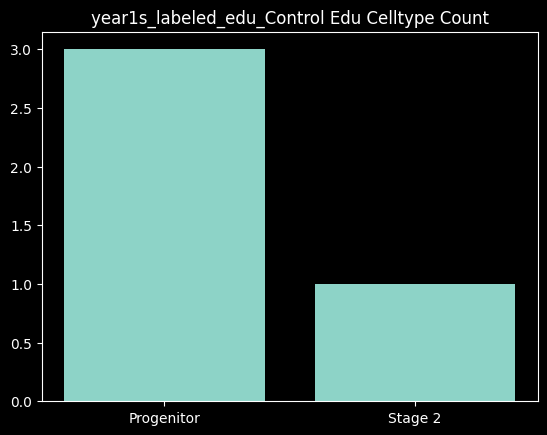

In [134]:
for sample in edu_pos_dict:
    quantify_cells_pipeline(edu_pos_dict[sample], sample, celltype_list, generate_charts=True, save = True, edu=True)